## Here we are trying to perform all the bagging and boosting regression technique on top of data science salaries dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [22]:
import seaborn as sns

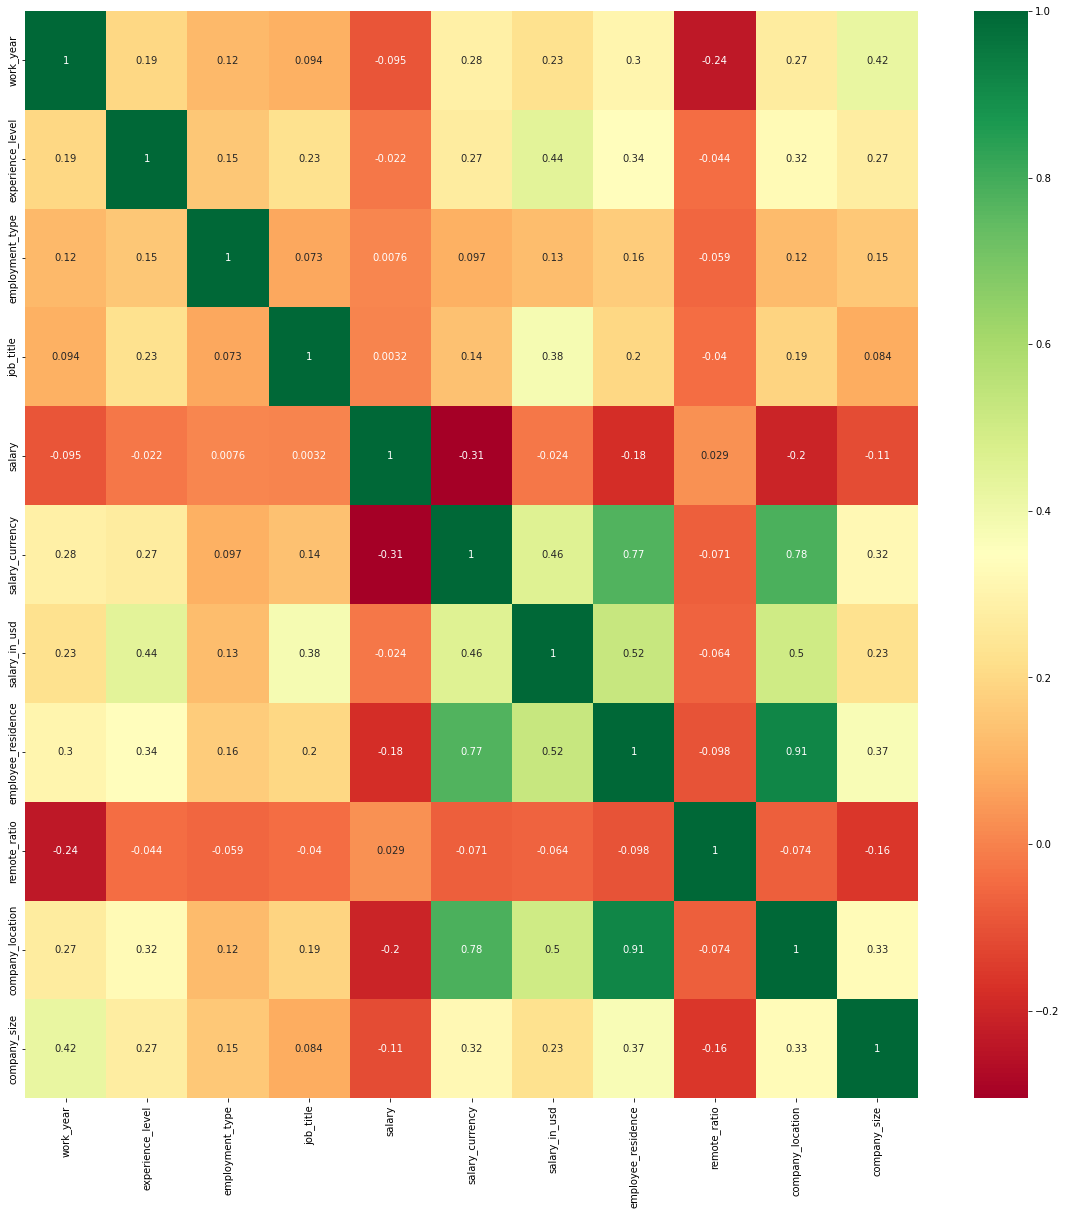

In [23]:
correlation=df.corr()
top_corr_feat= correlation.index
plt.figure(figsize=(20,20))
# plt heat map
graph=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')

### Numerical Variables

In [29]:
## list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  11


In [30]:
df[numerical_features].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,2,3,88,80000,11,85847,38,100,37,1
1,2023,1,2,73,30000,18,30000,74,100,69,0
2,2023,1,2,73,25500,18,25500,74,100,69,0
3,2023,2,3,62,175000,18,175000,73,100,67,2
4,2023,2,3,62,120000,18,120000,73,100,67,2


## Temporal Variables (DateTime Variables)

In [31]:
## list of temporal variables
year_feature=[feature for feature in df.columns if 'work_year' in feature]

year_feature

['work_year']

Text(0.5, 1.0, 'Salary vs Work Year')

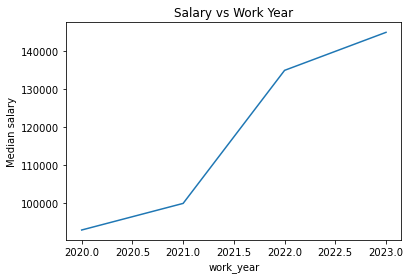

In [32]:
df.groupby('work_year')['salary'].median().plot()
plt.xlabel('work_year')
plt.ylabel('Median salary')
plt.title('Salary vs Work Year')

In [33]:
df['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

Text(0.5, 1.0, 'Salary vs remote ratio')

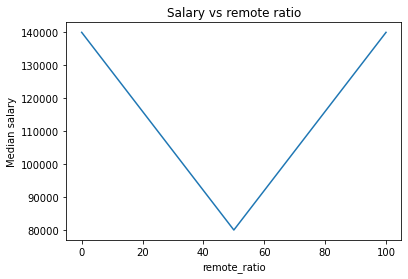

In [34]:
df.groupby('remote_ratio')['salary'].median().plot()
plt.xlabel('remote_ratio')
plt.ylabel('Median salary')
plt.title('Salary vs remote ratio')

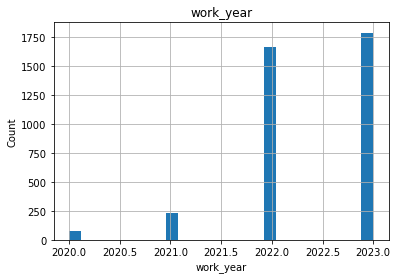

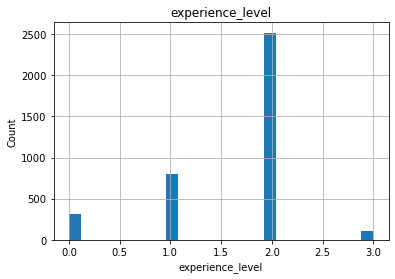

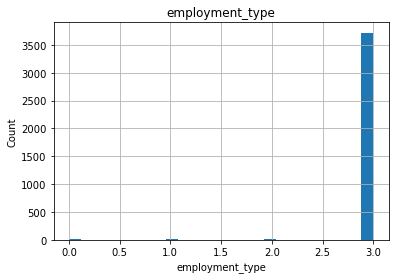

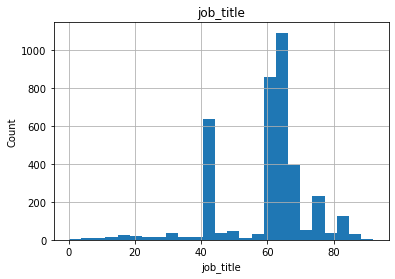

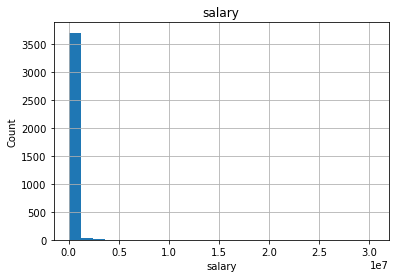

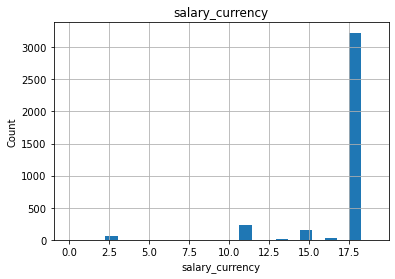

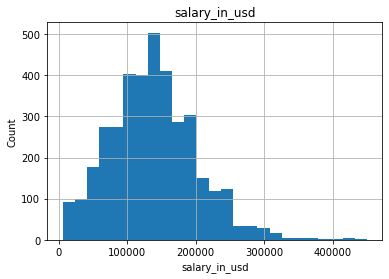

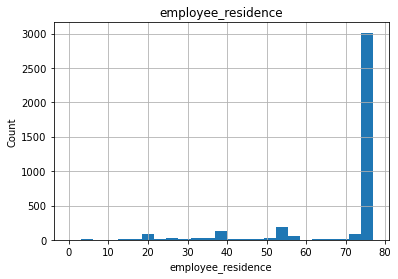

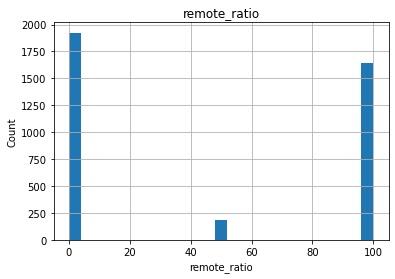

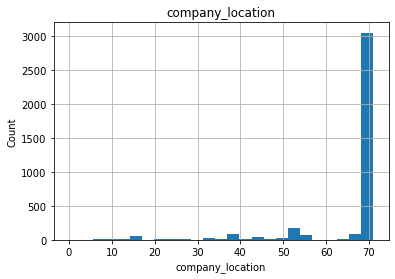

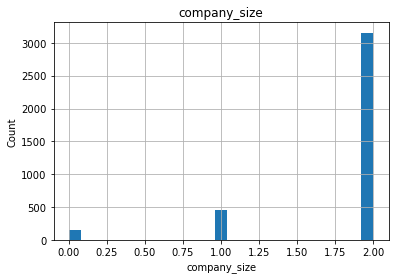

In [35]:
for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Categorical Features

In [15]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [16]:
df[categorial_features].head()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M


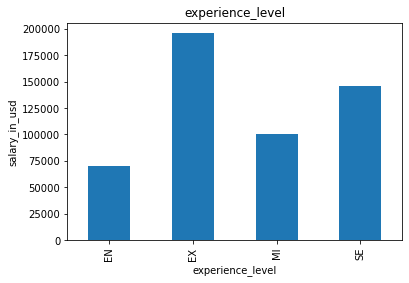

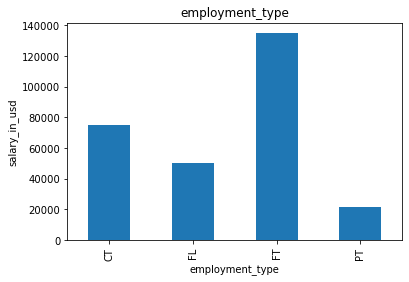

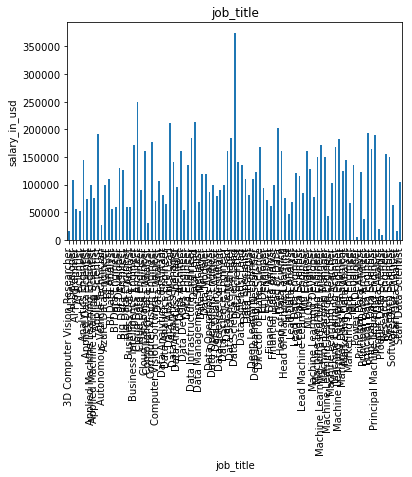

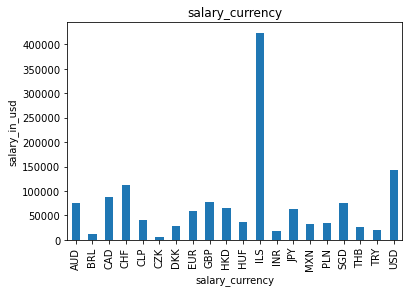

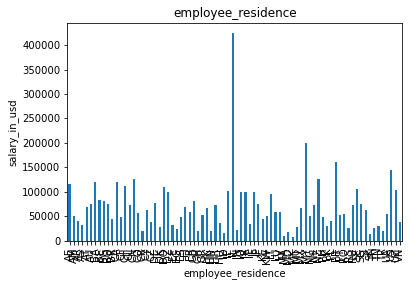

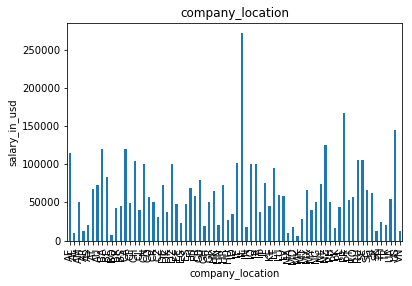

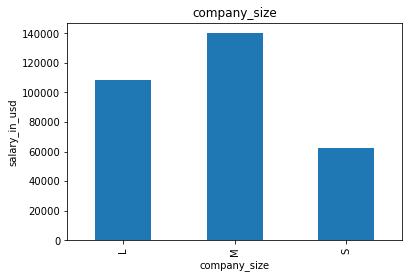

In [17]:
for feature in categorial_features:
    data=df.copy()
    data.groupby(feature)['salary_in_usd'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('salary_in_usd')
    plt.title(feature)
    plt.show()

In [18]:
df[categorial_features]

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


In [36]:
## Converting categorial feature into numerical one

for feature in categorial_features:
    labels_ordered=df.groupby([feature])['salary'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [37]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,2,66,80000,0,85847,31,100,26,2
1,2023,3,1,84,30000,9,30000,66,100,57,1
2,2023,3,1,84,25500,9,25500,66,100,57,1
3,2023,0,2,72,175000,9,175000,65,100,54,0
4,2023,0,2,72,120000,9,120000,65,100,54,0
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,2,72,412000,9,412000,66,100,57,2
3751,2021,3,2,66,151000,9,151000,66,100,57,2
3752,2020,1,2,72,105000,9,105000,66,100,57,1
3753,2020,1,1,74,100000,9,100000,66,100,57,2


In [38]:
df['employee_residence'].unique()

array([31, 66, 65, 44, 40, 36, 74, 71, 25, 41, 47, 17, 39, 54, 43, 30, 58,
       73,  5, 37, 35, 59, 55, 29, 67, 53, 38, 72, 33, 64, 23, 15, 32, 16,
       22, 61, 18, 26,  0, 28, 19, 12, 20,  1, 45, 34, 14, 50, 76,  2, 63,
       46,  7, 60, 77, 68, 70, 27, 21, 57,  9,  3, 48, 69, 75, 13,  6, 11,
       56, 52, 51, 42, 49,  8, 62,  4, 24, 10], dtype=int64)

In [39]:
X=df.drop(['salary'], axis=1)
y=df['salary']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [42]:
scaler=StandardScaler()

In [43]:
X_train=scaler.fit_transform(X_train)

In [44]:
X_test=scaler.transform(X_test)

## Bagging

In [55]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [46]:
bgr=BaggingRegressor()

In [47]:
bgr.fit(X_train,y_train)

BaggingRegressor()

In [48]:
y_predict=bgr.predict(X_test)

In [49]:
y_predict

array([ 195460. ,   79000. ,  130200.4,  205960. ,  200000. ,  102017. ,
        122000. , 1393000. ,  121970. ,  150000. ,   67600. ,  205716. ,
        160000. ,  110000. ,   21444.4,  120000. ,  222034. ,  130000. ,
        130000. ,  180000. ,  146000. ,   70000. ,  191475. ,  147060. ,
         68950. ,  236280. ,  200000. ,  310050. ,   85000. , 1230000. ,
        123479.6,   75000. ,  459800. ,  230000. ,  160000. ,  153400. ,
        140255. ,  222200. ,  190000. ,  186000. ,  165000. ,  148770. ,
         85813.2,   50000. ,  110000. ,   67400. ,   95000. ,  145000. ,
         50000. ,  185900. ,  175000. ,  235000. ,   78000. ,  310000. ,
        100000. ,  205960. ,  455600. ,   14006. ,   60000. ,   67650. ,
        120000. ,  257775. ,   61600. ,  116944. ,  100000. ,  120207. ,
        175000. , 1727199.7,   95000. ,   63290. ,   60300. ,  215125. ,
        184708. ,  130000. ,  130000. ,   35000. ,  160000. ,  375000. ,
        149028. ,  185900. ,  187740. ,  156400. , 

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse=mean_squared_error(y_test,y_predict)
mse

8903125604.788157

In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)

In [53]:
score

0.9629924000480962

### Bagging using Decision Tree

In [62]:
bagDT = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    # n_estimators=500, # number of trees
    # max_samples=0.25, # number of rows to each tree
    # bootstrap=True,   # sampling with replacement true
    # random_state=42
)

In [63]:
bagDT.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor())

In [64]:
y_predDT = bagDT.predict(X_test)

In [65]:
r2_score(y_test,y_predDT)

0.7130313443205059

### Bagging using SVM

In [83]:
bagSVR = BaggingRegressor(
    base_estimator=SVR()
)

In [84]:
bagSVR.fit(X_train,y_train)

BaggingRegressor(base_estimator=SVR())

In [85]:
y_predSVR = bagSVR.predict(X_test)

In [86]:
r2_score(y_test,y_predSVR)

-0.01081745187448746

### Applying Grid Search CV in bagging Regression

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [74]:
search = GridSearchCV(estimator=BaggingRegressor(), param_grid=parameters, cv=5)

In [75]:
search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [76]:
search.best_score_

0.7867312856767833

In [77]:
search.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 100}

### Applying Random Search CV in bagging Regression

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
rscv = RandomizedSearchCV(estimator=BaggingRegressor(), param_distributions=parameters, cv=5)

In [80]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.1, 0.4, 0.7, 1.0],
                                        'max_samples': [0.1, 0.4, 0.7, 1.0],
                                        'n_estimators': [50, 100, 500]})

In [81]:
rscv.best_score_

0.7887767531197336

In [82]:
rscv.best_params_

{'n_estimators': 50,
 'max_samples': 0.7,
 'max_features': 1.0,
 'bootstrap': True}

## Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf = RandomForestRegressor()

In [89]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
y_predr = rf.predict(X_test)

In [91]:
r2_score(y_test,y_predr)

0.9684608188428852

## Applying Grid Search CV in Random Forest Regression

In [93]:
params={
    'max_depth':[3,5,8,12],
    'n_estimators':[100,300,500],
    'criterion':['squared_error','absolute_error','poisson'],
    'max_features':['sqrt','log2']
}

In [113]:
grd=GridSearchCV(rf,param_grid=params,cv=5)

In [114]:
grd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 5, 8, 12],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [115]:
grd.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 100}

In [116]:
grd.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=8,
                      max_features='log2')

In [117]:
grd.best_score_

0.7540322762255528

### Applying Random Search CV in Random Forest Regression

In [109]:
rsrf = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5)

In [110]:
rsrf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [3, 5, 8, 12],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 300, 500]})

In [111]:
rsrf.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'absolute_error'}

In [112]:
rsrf.best_score_

0.7541333149220228

# Boosting

## Ada Boosting

In [118]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
adaR=AdaBoostRegressor()

In [120]:
adaR.fit(X_train,y_train)

AdaBoostRegressor()

In [122]:
adaR.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [123]:
y_pred = adaR.predict(X_test)

In [125]:
r2_score(y_pred,y_test)

0.8710703030955962

### Applying Grid Search CV in Ada Boosting

In [126]:
params={
    'n_estimators':[100,300,500],
    'learning_rate':[0.1,0.3,0.5,0.7,1.0],
    'loss':['linear', 'exponential','square']
}

In [127]:
grd=GridSearchCV(adaR,param_grid=params,cv=5)

In [128]:
grd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'loss': ['linear', 'exponential', 'square'],
                         'n_estimators': [100, 300, 500]})

In [129]:
grd.best_params_

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 100}

In [130]:
grd.best_score_

0.8282850821559865

### Applying Random Search CV in Ada Boosting

In [131]:
rnd=RandomizedSearchCV(adaR,param_distributions=params,cv=5)

In [132]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          1.0],
                                        'loss': ['linear', 'exponential',
                                                 'square'],
                                        'n_estimators': [100, 300, 500]})

In [133]:
rnd.best_params_

{'n_estimators': 300, 'loss': 'square', 'learning_rate': 1.0}

In [134]:
rnd.best_score_

0.8142105568657086

### Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

In [136]:
gbR=GradientBoostingRegressor()

In [137]:
gbR.fit(X_train,y_train)

GradientBoostingRegressor()

In [138]:
gbR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [139]:
y_predict=gbR.predict(X_test)

In [140]:
r2_score(y_pred,y_test)

0.8710703030955962

### Applying Grid Search CV in Graident Boosting

In [141]:
params={
    'loss':['squared_error','absolute_error','huber','quantile'],
    'learning_rate':[0.1,0.3,0.5,0.7,1.0],
    'n_estimators':[100,300,500],
    'criterion':['friedman_mse','squared_error'],
    'max_features':['sqrt','log2']
}

In [142]:
grd=GridSearchCV(gbR,param_grid=params,cv=5)

In [143]:
grd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [144]:
grd.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.3,
 'loss': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 500}

In [145]:
grd.best_score_

0.8827203549686585

### Applying Randomized Search CV in Graident Boosting

In [146]:
rnd=RandomizedSearchCV(gbR,param_distributions=params,cv=5)

In [147]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          1.0],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [100, 300, 500]})

In [148]:
rnd.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'loss': 'absolute_error',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [149]:
rnd.best_score_

0.7729749959327423

## XGBoost

In [150]:
import xgboost as xgb

In [154]:
xgbR=xgb.XGBRegressor()

In [155]:
xgbR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [157]:
y_predict=xgbR.predict(X_test)

In [158]:
r2_score(y_pred,y_test)

0.8710703030955962